In [71]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

In [72]:
# Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

In [73]:
# Carregar o conjunto de dados
df_train = pd.read_csv("C://Users//isinh//Downloads//house-prices-advanced-regression-techniques//train.csv")

In [74]:
#1 - Análise Exploratória Inicial dos Dados

In [75]:
# Descrição estatística das variáveis numéricas
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [76]:
df_train.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [77]:
# Identificar variáveis categóricas
categorical_features = df_train.select_dtypes(include=['object']).columns
print("Variáveis categóricas:", categorical_features)

Variáveis categóricas: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [78]:
# Identificar variáveis numéricas
numerical_features = df_train.select_dtypes(exclude=['object']).columns
print("Variáveis numéricas:", numerical_features)

Variáveis numéricas: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [79]:
# Verificar valores faltantes
missing_values = df_train.isnull().sum()
print("Valores faltantes por coluna:\n", missing_values[missing_values > 0])

Valores faltantes por coluna:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


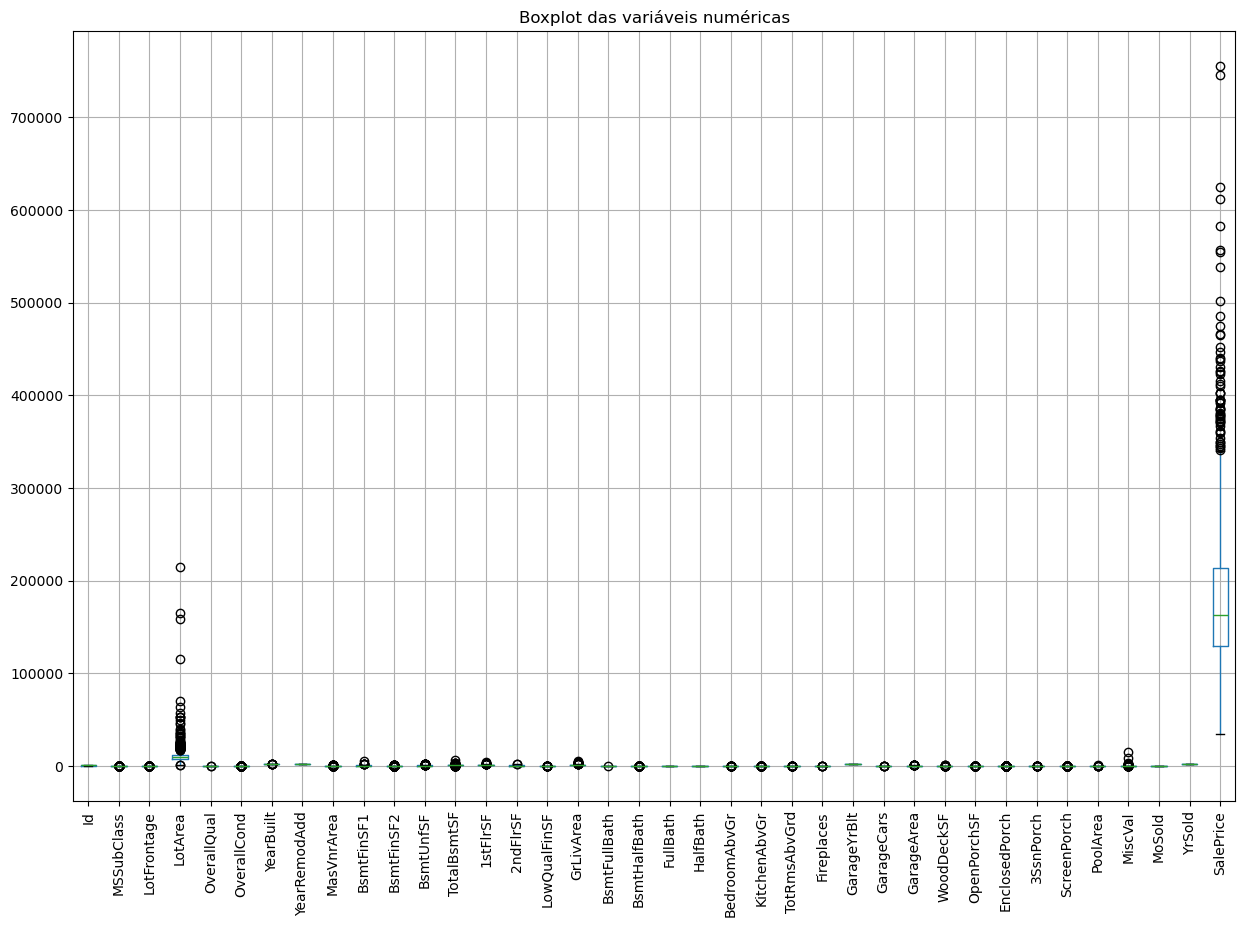

In [80]:
# Visualizar outliers para variáveis numéricas
plt.figure(figsize=(15, 10))
df_train[numerical_features].boxplot(rot=90)
plt.title('Boxplot das variáveis numéricas')
plt.show()

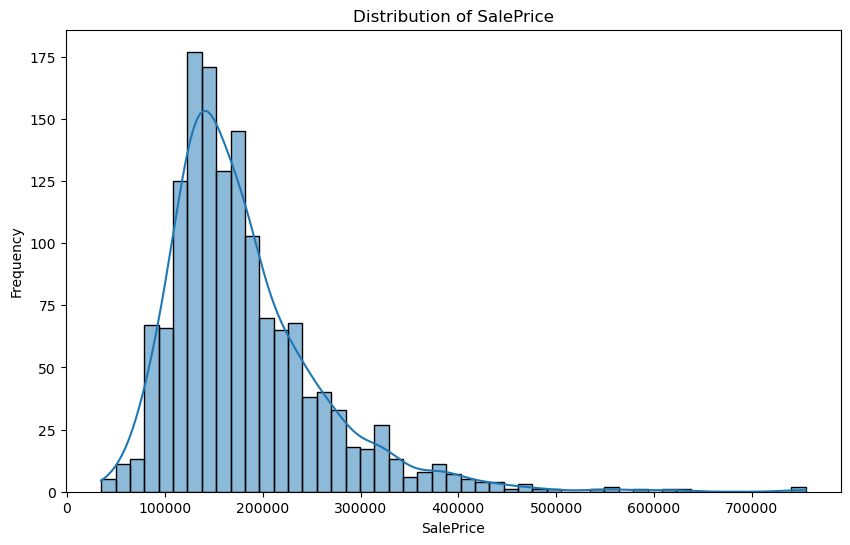

In [81]:
# Plotting the distribution of 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(df_train['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

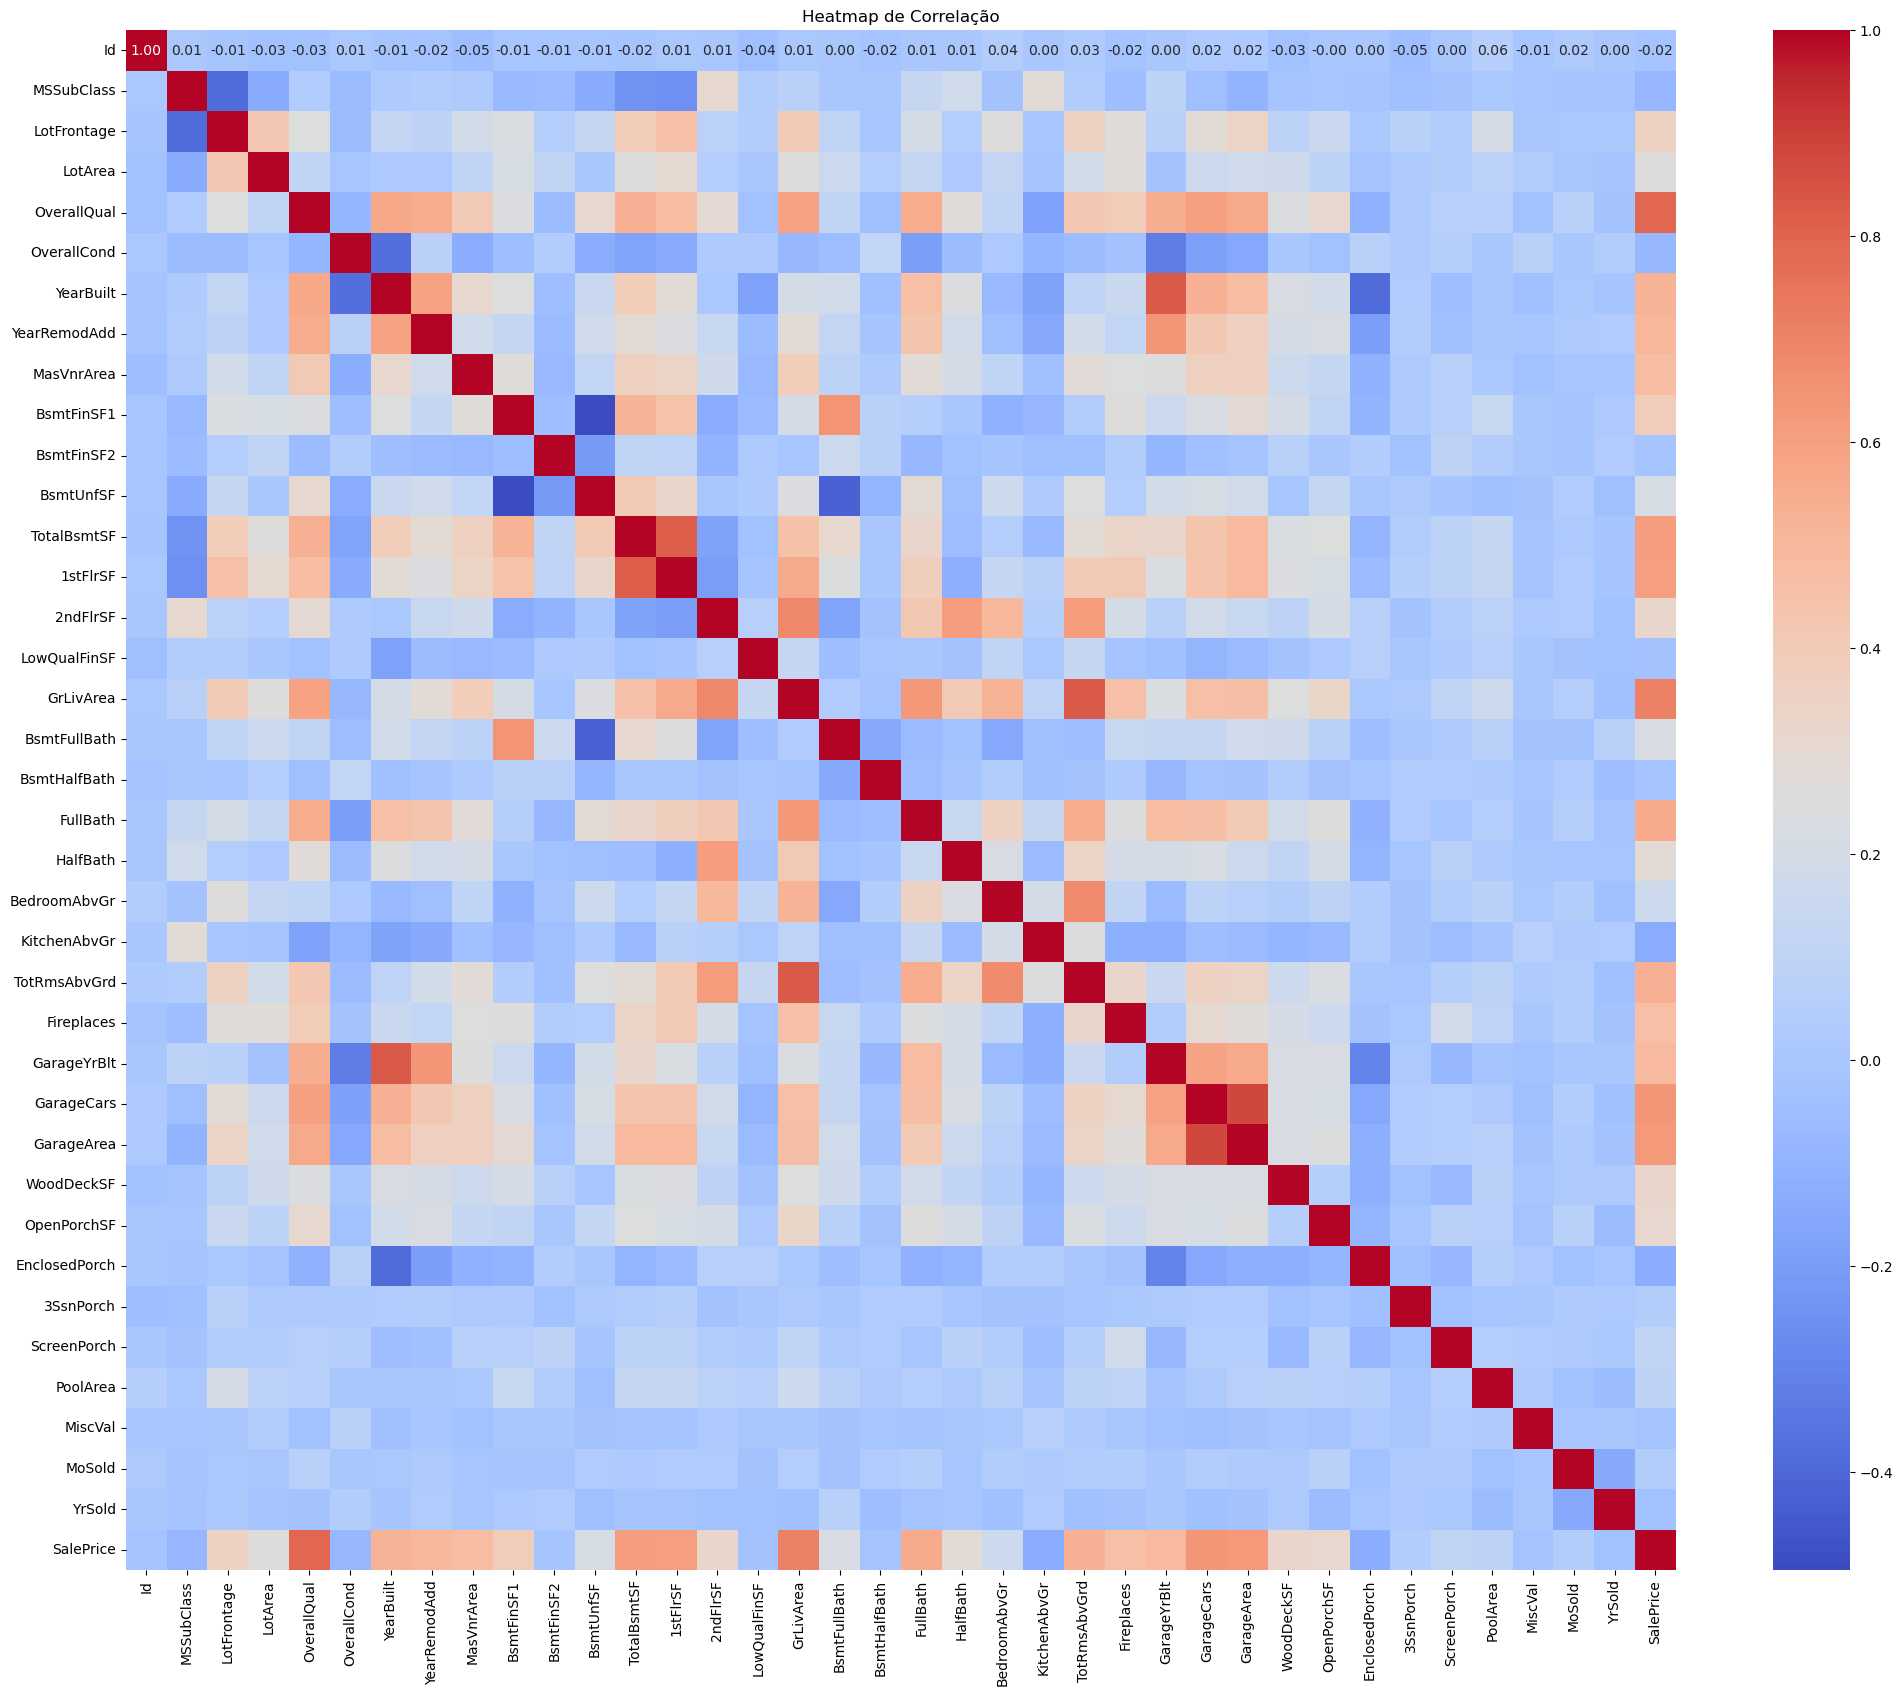

In [82]:
# Identificar variáveis numéricas
num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns

# Calcular a matriz de correlação
corr_matrix = df_train[num_cols].corr()

# Plotar o heatmap de correlação
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap de Correlação')
plt.show()

In [83]:
# PARTE 3

In [84]:
# Transformar SalePrice em uma variável binária
median_price = df_train['SalePrice'].median()
df_train['AboveMedianPrice'] = (df_train['SalePrice'] > median_price).astype(int)


In [85]:
# Selecionar as variáveis explicativas e a variável alvo
X = df_train.drop(columns=['Id', 'SalePrice', 'AboveMedianPrice'])
y = df_train['AboveMedianPrice']

In [86]:
# Identificar variáveis categóricas e numéricas
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Definir transformações para variáveis categóricas e numéricas
# Definir transformações para variáveis categóricas e numéricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

# Combinar transformações usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Ajustar e transformar os dados de treinamento
X_processed = preprocessor.fit_transform(X)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Ajustar o modelo de regressão logística
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [87]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.9486301369863014
Confusion Matrix:
[[149  12]
 [  3 128]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       161
           1       0.91      0.98      0.94       131

    accuracy                           0.95       292
   macro avg       0.95      0.95      0.95       292
weighted avg       0.95      0.95      0.95       292

ROC AUC: 0.9812242188611255


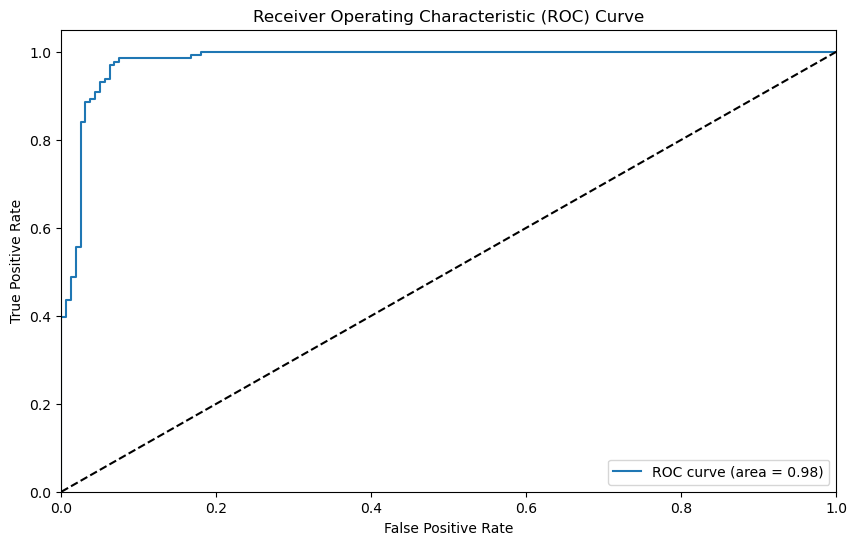

In [88]:
# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [89]:
# ANÁLISE DA REGRESSÃO LOGISTICA

# Accuracy (Acurácia): A acurácia do modelo é de aproximadamente 94.86%, o que indica que, em geral, o modelo é bastante preciso na classificação
#das duas classes.

# Confusion Matrix (Matriz de Confusão): A matriz de confusão mostra que o modelo previu corretamente 149 instâncias da classe 0 e 128
#da classe 1. Houve 12 falsos positivos (previsões erradas da classe 1) e 3 falsos negativos (previsões erradas da classe 0).

#Classification Report (Relatório de Classificação):
        # Precision: A precisão para a classe 0 é de 98%, e para a classe 1 é de 91%. Isso significa que quando o modelo prevê a classe 0, ele
#está correto 98% das vezes, e quando prevê a classe 1, está correto 91% das vezes.
        # Recall: O recall para a classe 0 é de 93%, e para a classe 1 é de 98%. Isso indica que o modelo é capaz de identificar 93% de todas as
#instâncias reais da classe 0 e 98% da classe 1.
        # F1-score: O F1-score é a média harmônica entre precisão e recall. Os valores são altos para ambas as classes, o que é bom.

# ROC AUC (Area Under the Curve): O valor de 0.9812 é muito próximo de 1, o que indica um excelente desempenho do modelo. Quanto mais próxima a AUC
#estiver de 1, melhor o modelo é capaz de distinguir entre as duas classes.

# Gráfico ROC Curve: O gráfico mostra uma curva que se aproxima do canto superior esquerdo, o que indica um bom desempenho do modelo. 
#A linha pontilhada representa um classificador aleatório; uma curva ROC que se aproxima dessa linha representa um desempenho semelhante ao aleatório,
#enquanto que uma curva distante (e acima) representa um desempenho superior.

#Interpretando todos esses dados em conjunto, podemos concluir que o desempenho do modelo é geralmente bom, com uma alta acurácia, excelente ROC AUC
#e bons valores de precisão, recall e F1-score. 


In [90]:
# PARTE 4

In [91]:
# Selecionar variáveis numéricas
numerical_features = df_train.select_dtypes(exclude=['object']).columns
numerical_features = numerical_features.drop('SalePrice')  # Excluindo a variável alvo

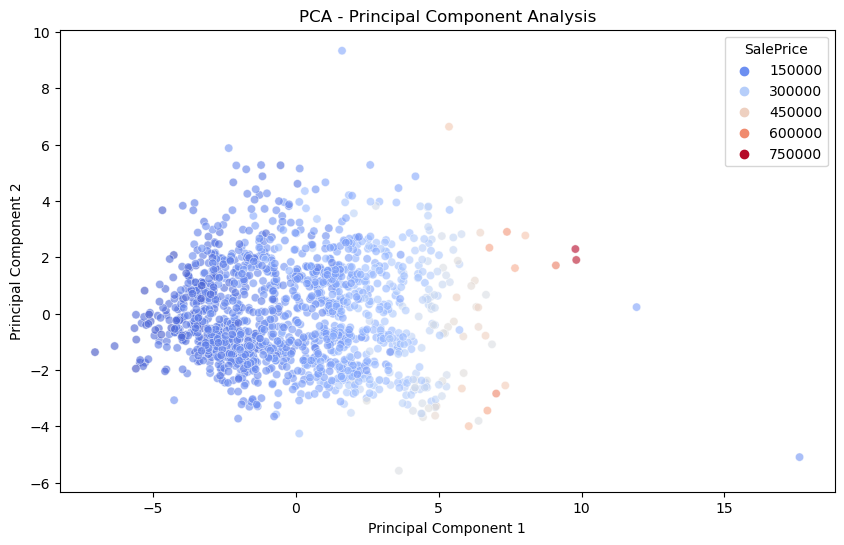

In [92]:
# Imputar valores faltantes nas variáveis numéricas
imputer = SimpleImputer(strategy='mean')
df_train[numerical_features] = imputer.fit_transform(df_train[numerical_features])

# Normalizar as variáveis numéricas
scaler = StandardScaler()
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])

# Aplicar PCA
pca = PCA(n_components=2)  # Reduzindo para 2 componentes principais
principal_components = pca.fit_transform(df_train[numerical_features])

# Criar um DataFrame com os componentes principais
df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Adicionar a variável alvo para visualização
df_pca['SalePrice'] = df_train['SalePrice']

# Visualizar os componentes principais
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='SalePrice', data=df_pca, palette='coolwarm', alpha=0.6)
plt.title('PCA - Principal Component Analysis')
plt.show()


In [93]:
#Analise do gráfico
# A maior parte dos pontos está concentrada em torno do centro, indicando que os dados estão bastante centralizados em torno de 
#valores médios para os dois componentes principais.
# Pontos mais altos no eixo X tendem a ter preços de venda mais altos, conforme indicado pela mudança de cor de azul para vermelho.

In [94]:
# Visualizar a variância explicada pelos componentes principais
explained_variance = pca.explained_variance_ratio_
print(f"Variância explicada pelos componentes principais: {explained_variance}")


Variância explicada pelos componentes principais: [0.20326536 0.0843397 ]


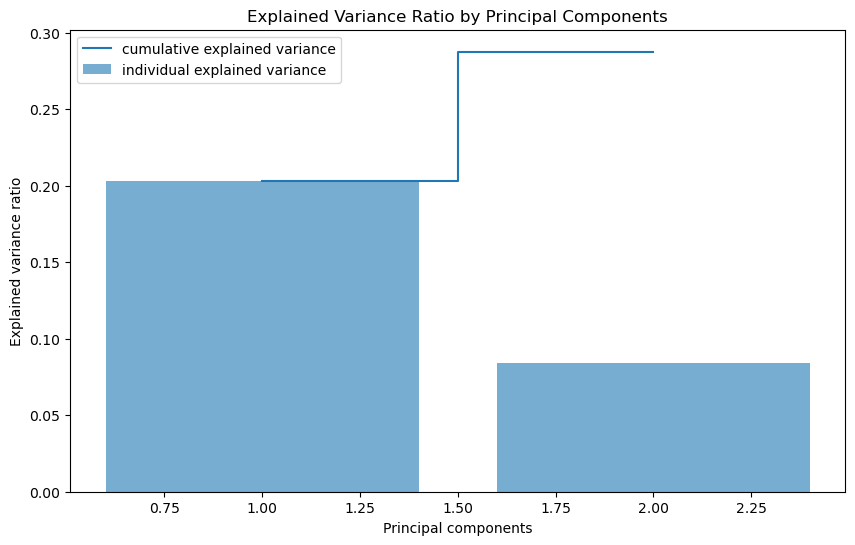

In [95]:
# Plotar a variância explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, align='center', label='individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend(loc='best')
plt.show()

In [97]:
# Análise da Redução de Dimensionalidade
#Existem duas barras que representam a variância explicada por duas componentes principais. A barra correspondente à "Principal component 1" é 
#muito maior do que a barra para a "Principal component 2", indicando que a primeira componente principal explica uma proporção muito maior da 
#variância nos dados.

#Além disso, há uma linha azul clara acima das barras, que representa a variância explicada acumulada. A linha começa no topo da primeira barra 
#e termina no topo da segunda, indicando que a soma da variância explicada pelas duas componentes principais é a altura combinada das duas barras.

#A partir deste gráfico, podemos inferir que a primeira componente principal é significativamente mais importante para explicar a variância dos
#dados do que a segunda componente principal. Isso pode ajudar na decisão de quantas componentes principais reter para uma análise de dados
#simplificada, mantendo a maior parte da informação original.

In [98]:
# PARTE 5

In [ ]:
# COMPARAÇÃO ENTRE OS MODELOS

# PCA:
       # A PCA nos dá uma ideia de como os dados estão distribuídos em um espaço de menor dimensão e como os componentes principais se 
#relacionam com a variável SalePrice.
        # É útil para visualização e para entender a variabilidade nos dados.
    # Curva ROC:
        # A curva ROC nos dá uma avaliação quantitativa do desempenho do modelo de classificação.
        # A AUC de 0.98 indica que o modelo de regressão logística é muito eficaz.

#Conclusão

# Uso de PCA:
        # A PCA é útil para reduzir a dimensionalidade dos dados e entender a estrutura subjacente dos dados.
        # Podemos ver que os componentes principais têm uma correlação com SalePrice, especialmente o primeiro componente principal.
    # Avaliação do Modelo com Curva ROC:
        # A curva ROC mostra que o modelo de classificação usado para prever se o preço de venda está acima ou abaixo da mediana tem um 
#excelente desempenho.
        # A AUC de 0.98 é um forte indicador de que o modelo é capaz de distinguir entre as classes com alta precisão.

# Ambas as técnicas são complementares e fornecem diferentes insights sobre os dados e o desempenho do modelo. A PCA nos ajuda a visualizar 
#a variabilidade nos dados, enquanto a curva ROC fornece uma avaliação quantitativa do desempenho do modelo de classificação.